In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as si
import imread
from collections import OrderedDict
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# 1 K-means Clustering

## 1.1 Implementing K-means

In [2]:
def findClostCentroids(X, centroids):
    
    K = len(centroids)
        
    norm = np.zeros((X.shape[0], K))
    for j in range(K):
        norm[:,j] = np.sum(np.abs(X - centroids[j]), axis=1)**2
    
    idx = np.argmin(norm, axis=1)
    return idx

def computeCentroids(X, idx, K):
    
    m, n = X.shape
    
    centroids = np.zeros((K,n))
    for j in range(K):
        ind = j == idx
        centroids[j,:] = np.mean(X[ind,:], axis=0)
    
    return centroids

In [3]:
a = si.loadmat('ex7_octave/ex7data2.mat')
X = a['X']

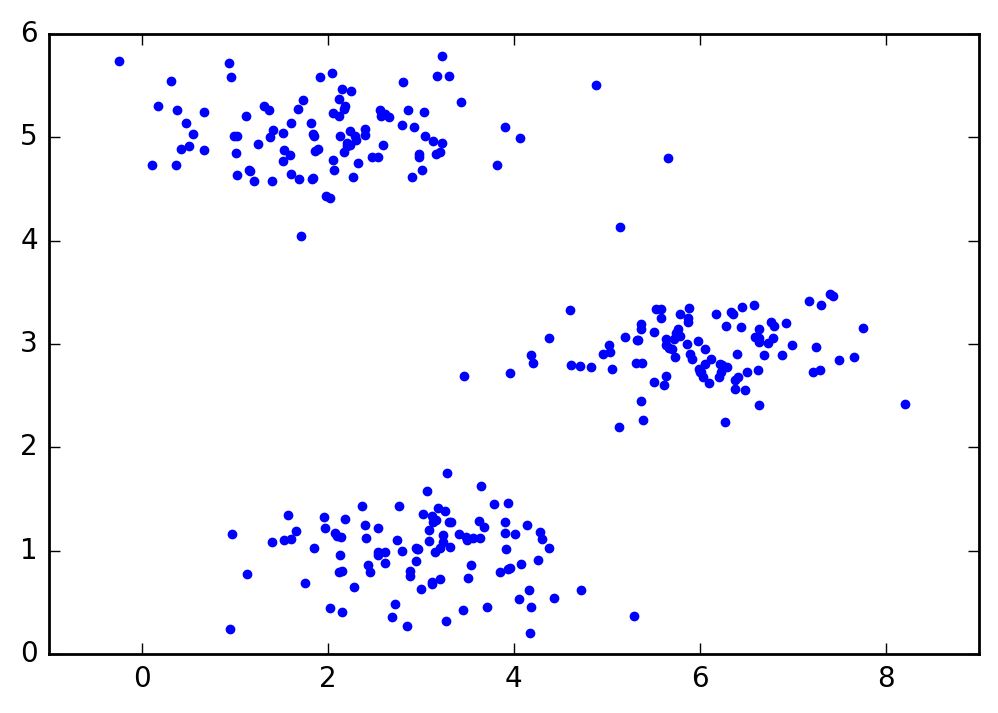

In [4]:
plt.plot(X[:,0], X[:,1], '.')

### 1.1.1 Finded closest centroids

In [5]:
K = 3
initial_centroids = [np.array([3,3]), np.array([6,2]), 
                     np.array([8,5])]

idx = findClostCentroids(X, initial_centroids)
print idx[:3]

[0 2 1]


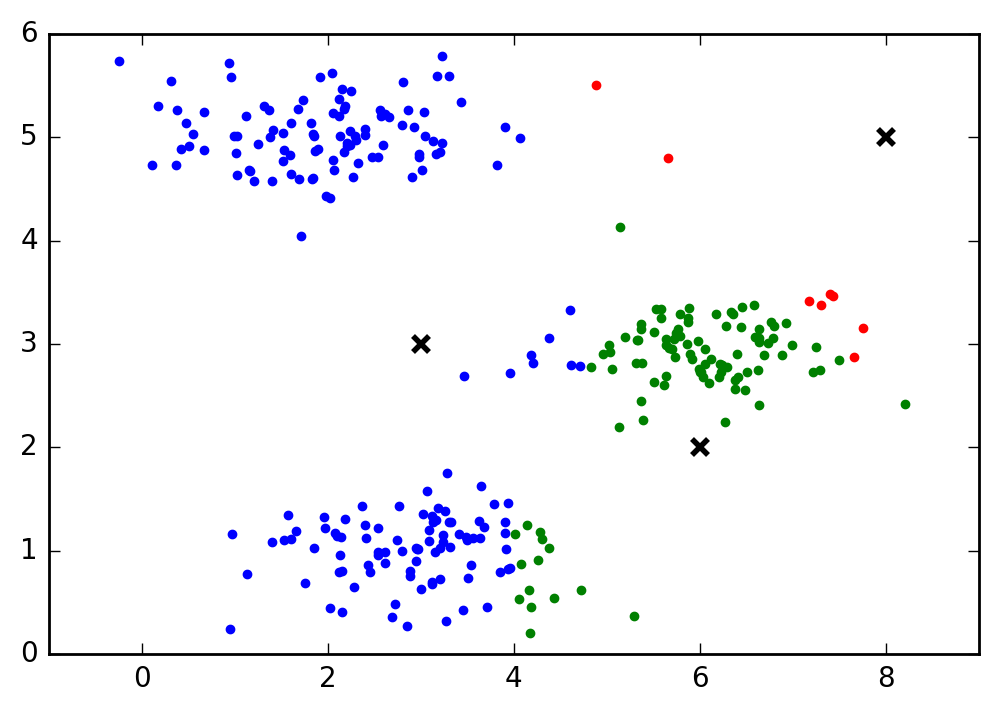

In [6]:
for ii in range(K):
    ind = idx == ii
    plt.plot(X[ind[:],0], X[ind[:],1], '.')
    plt.plot(initial_centroids[ii][0], 
             initial_centroids[ii][1], 'xk', 
             mew=2)

### 1.1.2 Computing the centroid means

In [7]:
centroids = computeCentroids(X, idx, K)
print centroids

[[ 2.43843803  3.14015163]
 [ 5.81873176  2.63143356]
 [ 6.9074246   3.75972133]]


## 1.2 K-means on example data set

In [8]:
def runkMeans(X, initial_centroids, max_iters, 
              plot_progress=True):
    
    # initial values
    m, n = X.shape
    K = len(initial_centroids)
    centroids = [ic for ic in initial_centroids]
    all_centroids = []
    idx = np.zeros(m)
    
    for ii in range(max_iters):
        
        idx = findClostCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        all_centroids.append(centroids)
        
    if plot_progress:
        
        for j in range(K):
            x = [ac[j,0] for ac in all_centroids]
            y = [ac[j,1] for ac in all_centroids]
            plt.plot(x, y, 'x-', color='k', mew=2)
            
        for ii in range(K):
            ind = idx == ii
            plt.plot(X[ind[:],0], X[ind[:],1], '.')
        
    return centroids, idx

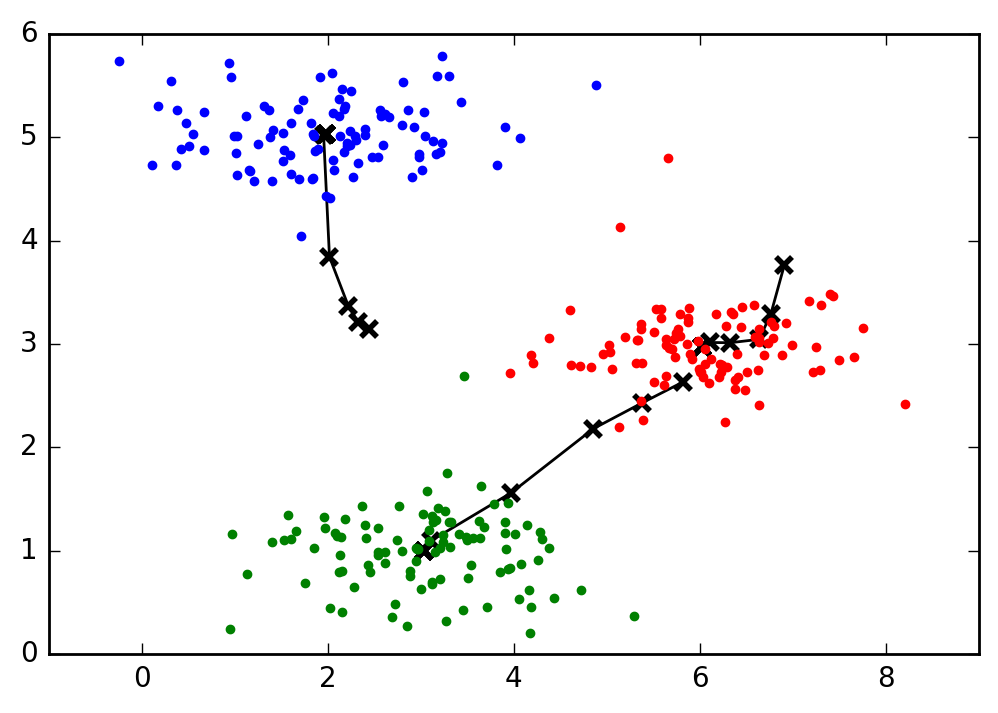

In [9]:
K = 3
max_iters = 10
initial_centroids = [np.array([3,3]), np.array([6,2]), 
                     np.array([8,5])]

centroids, idx = runkMeans(X, initial_centroids, max_iters)

## 1.3 Random Initialization

In [10]:
def kMeansInitCentroids(X, K):
    
    ind = np.random.permutation(X.shape[0])
    
    return X[ind[:K], :]

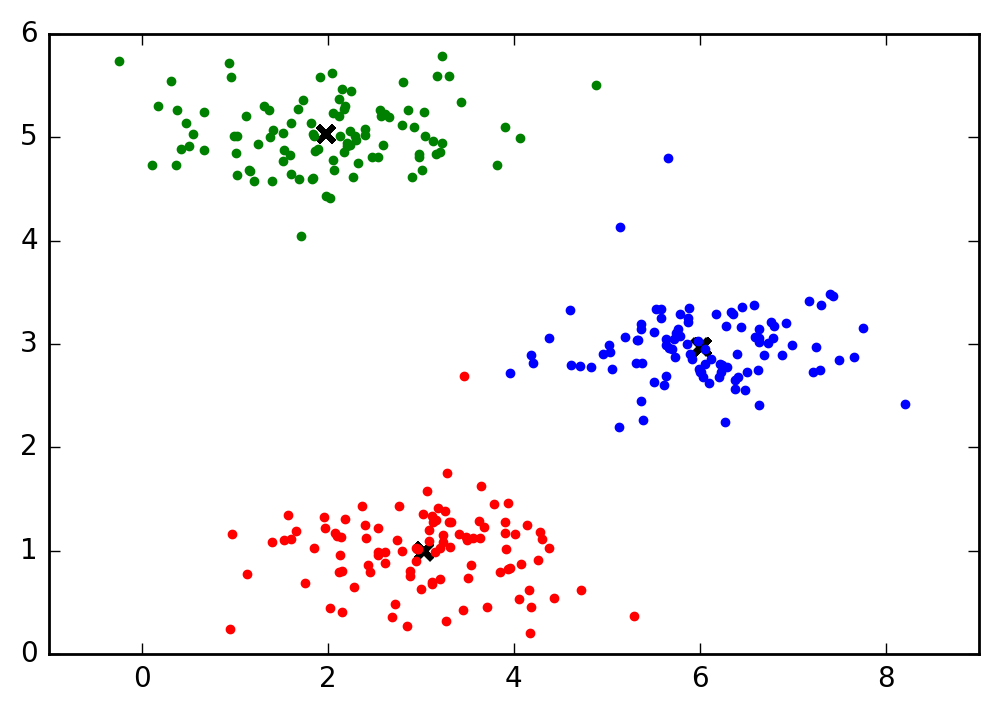

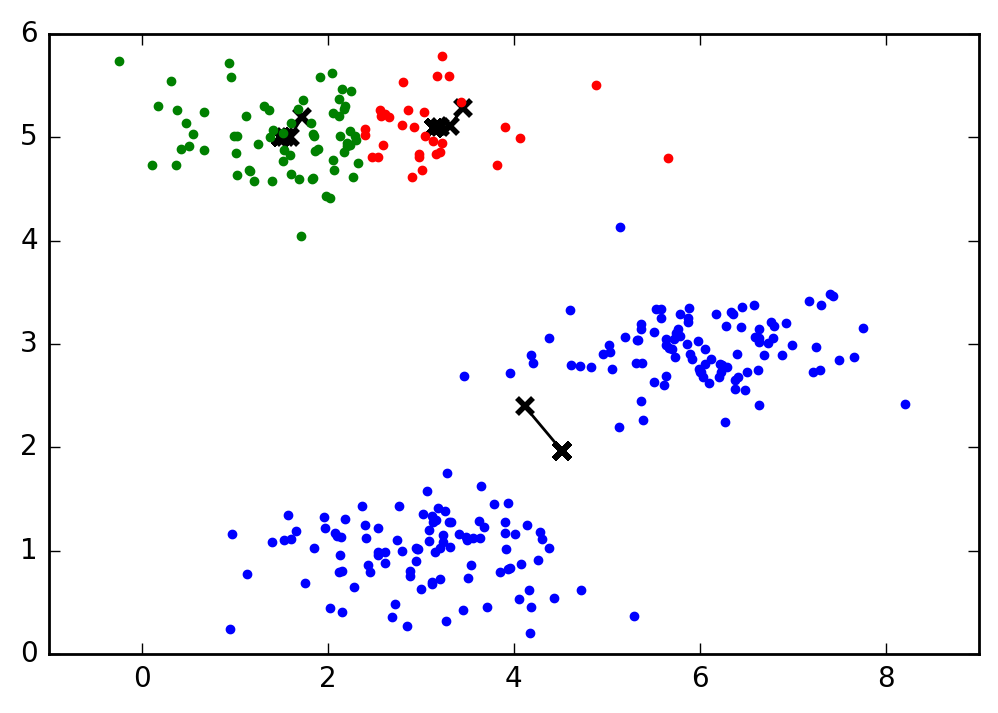

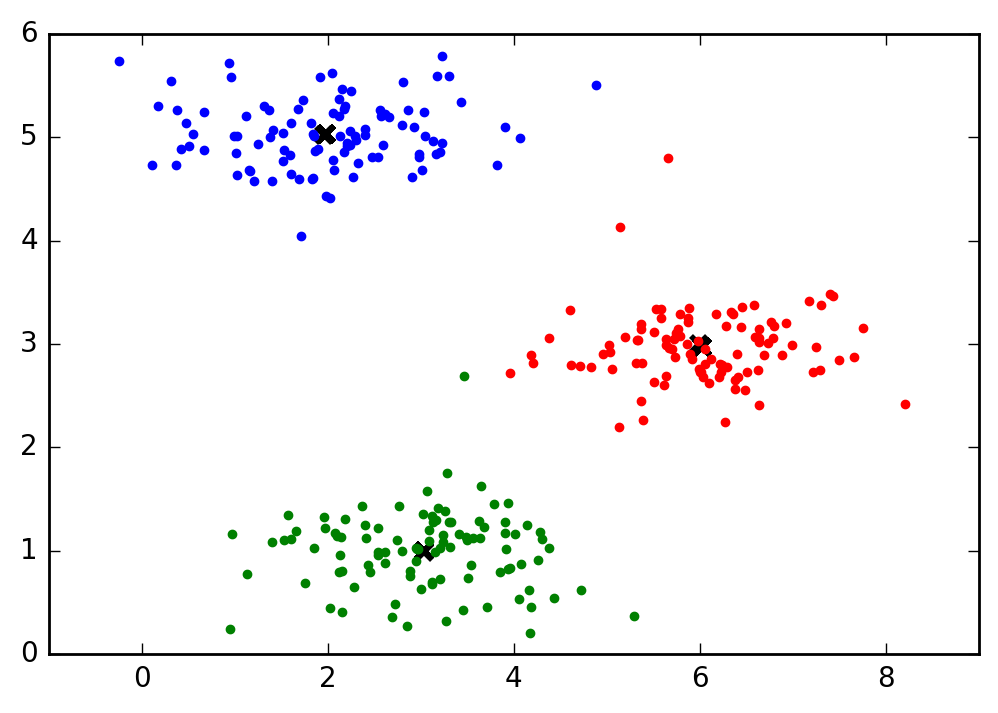

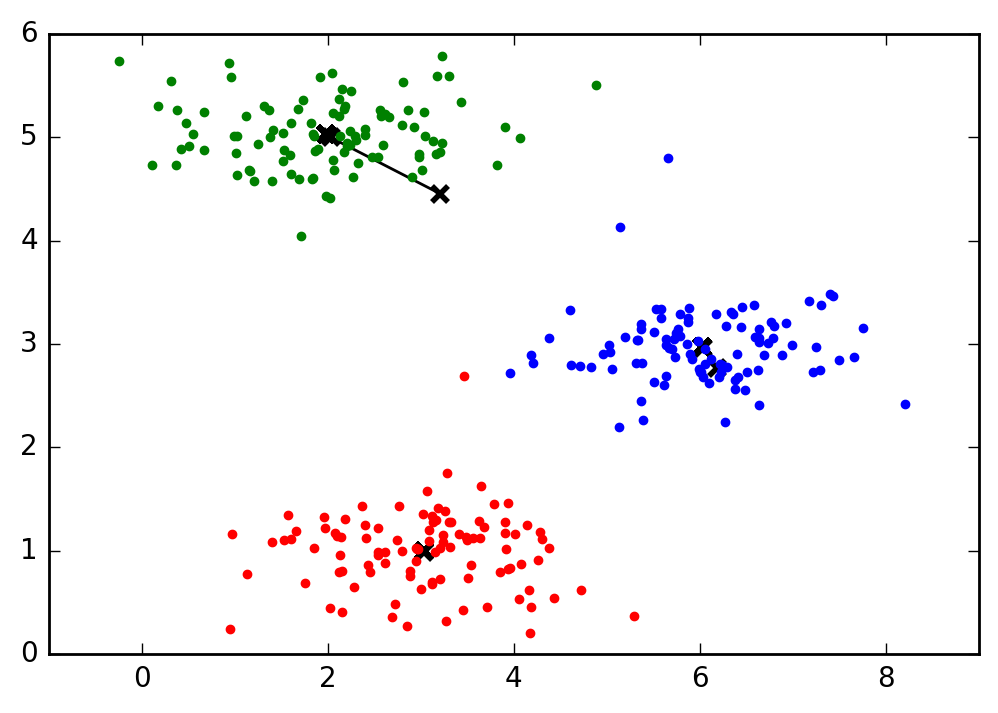

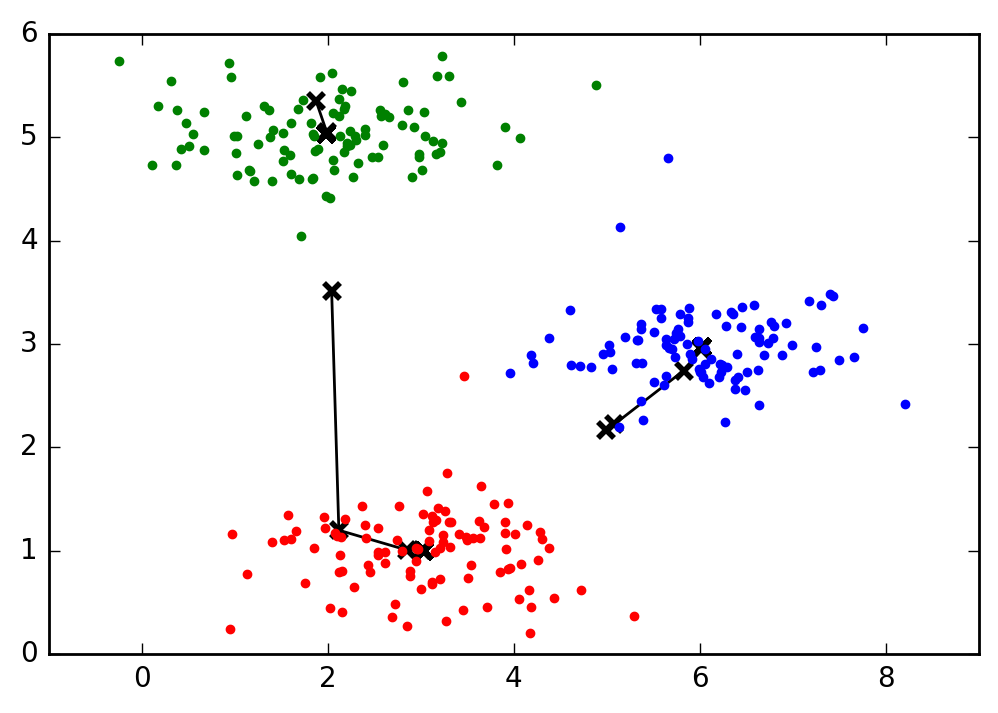

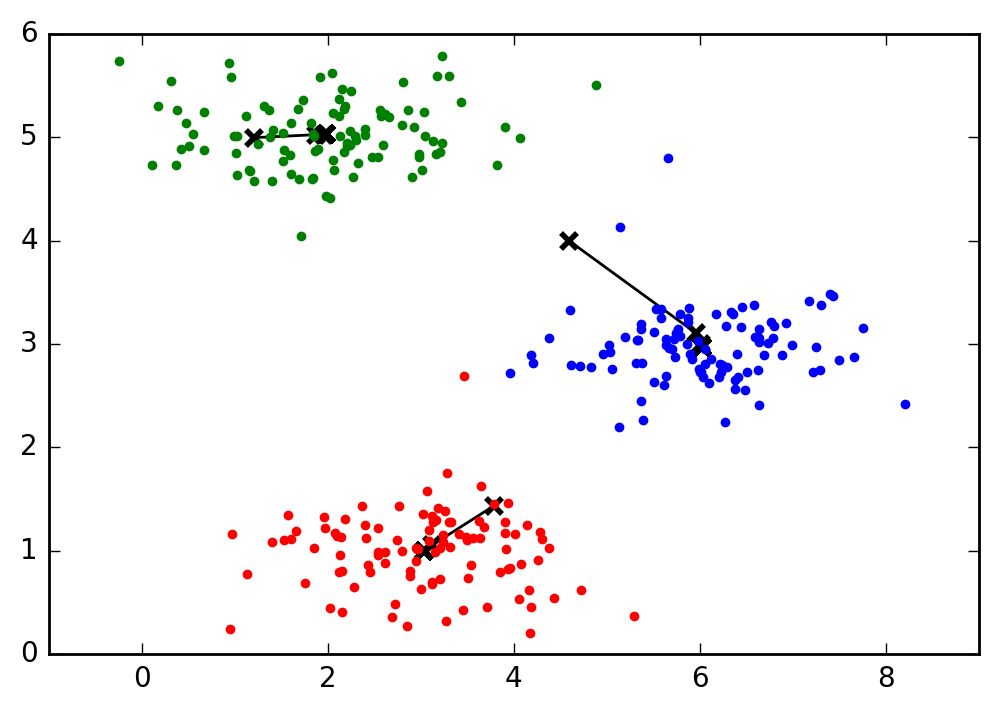

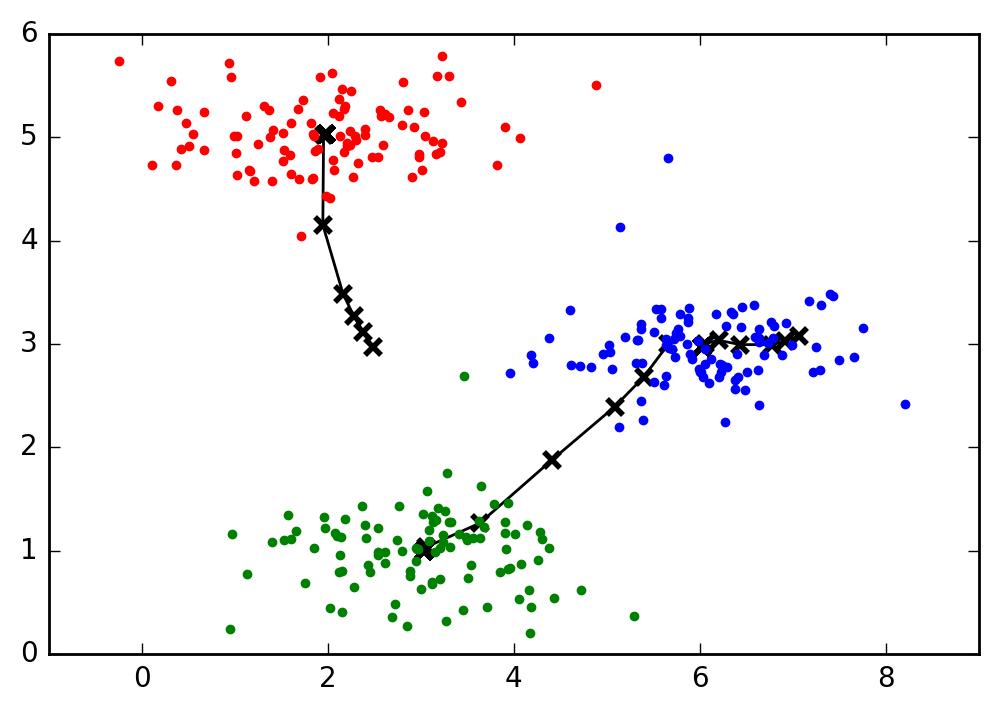

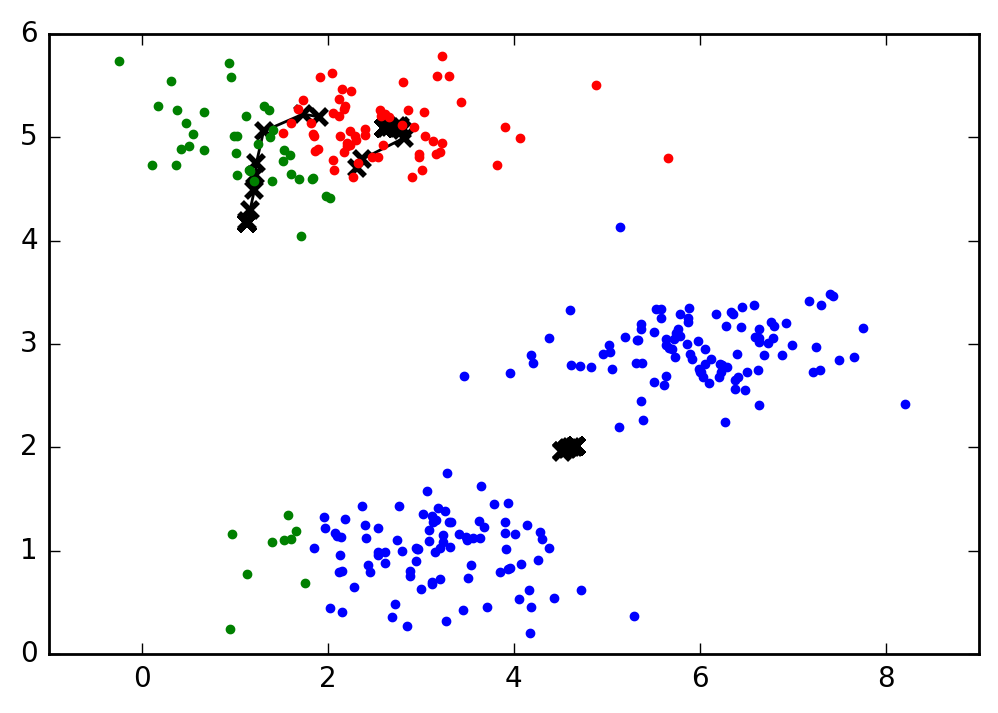

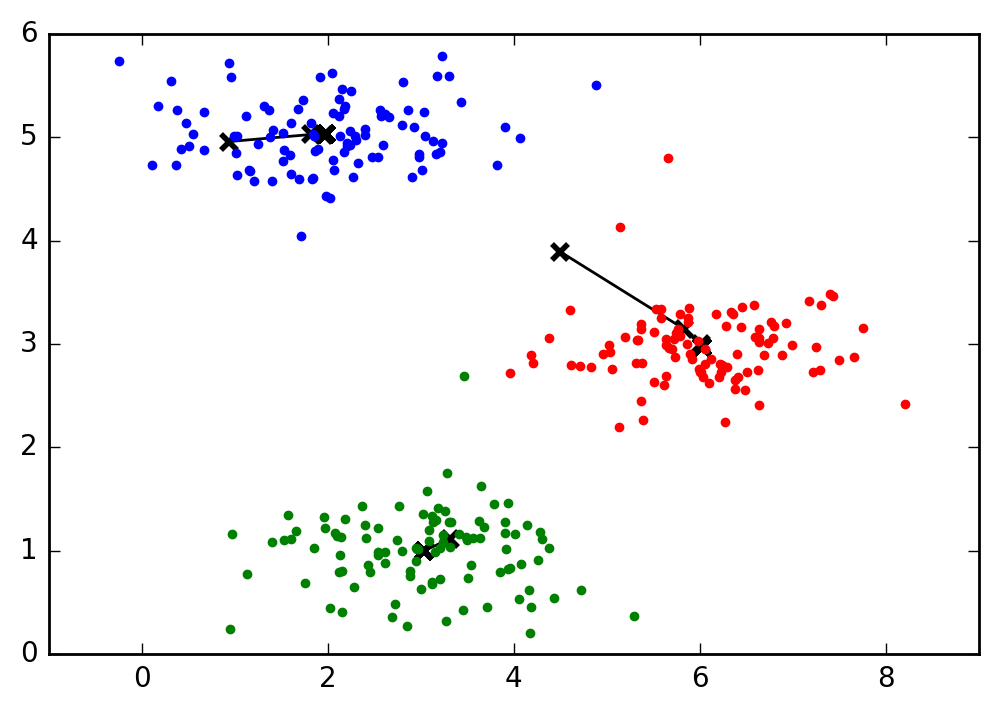

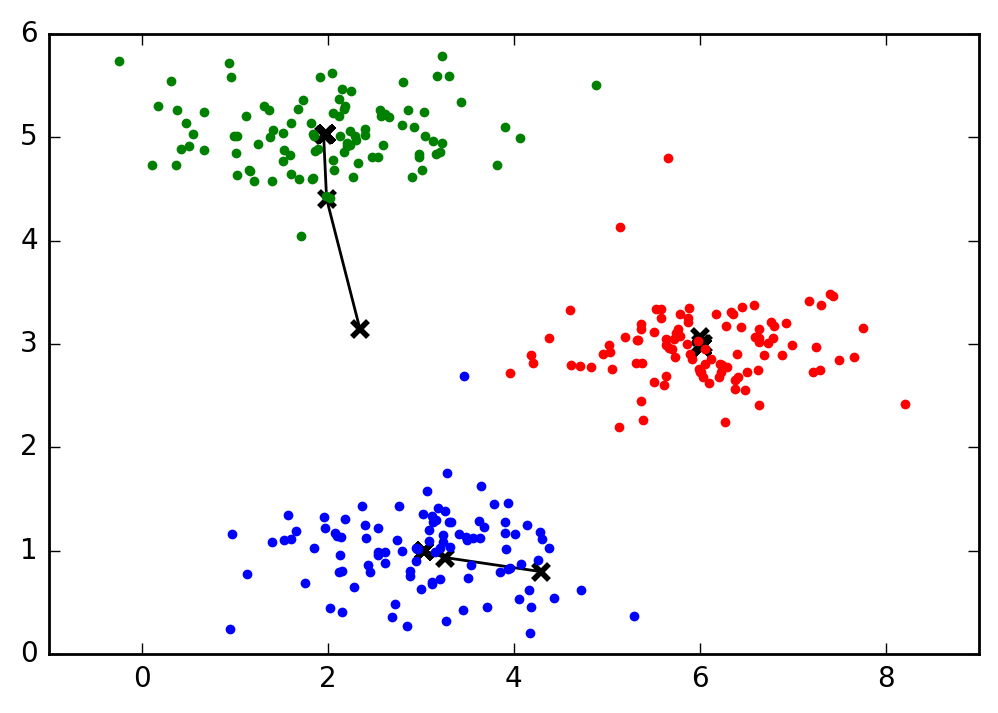

In [11]:
K = 3
max_iters = 20

for ii in range(10):
    plt.figure()
    initial_centroids = kMeansInitCentroids(X,K)
    centroids, idx = runkMeans(X, initial_centroids, max_iters)

## 1.4 Image compression with K-means

In [12]:
a = si.loadmat('ex7_octave/bird_small.mat')
A = a['A'] / 255
X = np.reshape(A, (A.shape[0]*A.shape[1],3))

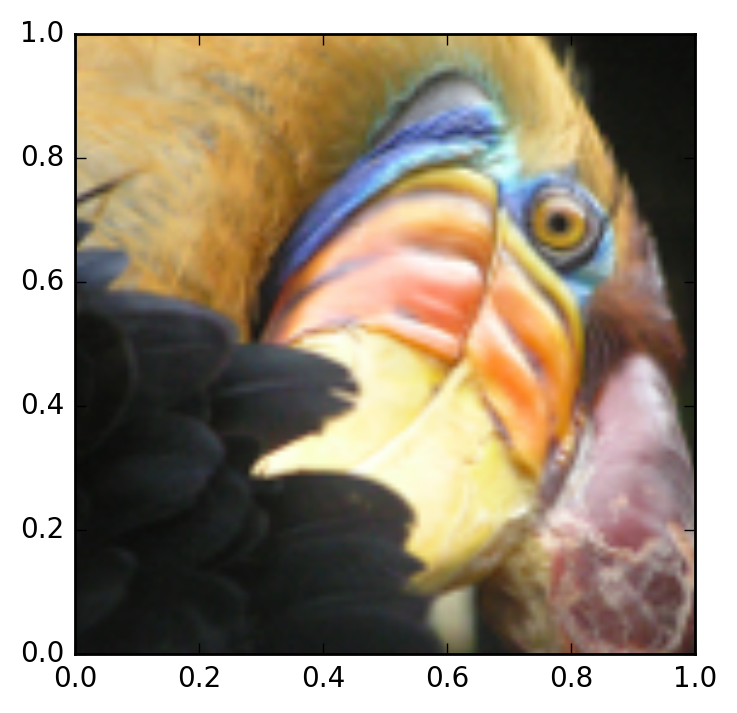

In [13]:
plt.imshow(A, extent=[0, 1, 0, 1])


In [14]:
K = 20
max_iters=100

initial_centroids = kMeansInitCentroids(X, K)

centroids, idx = runkMeans(X, initial_centroids, max_iters, 
                           plot_progress=False)

In [15]:
# find closest members
idx = findClostCentroids(X, centroids)

# map each pixex to its centroid value
X_recovered = centroids[idx,:]

# reshape
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], 3))

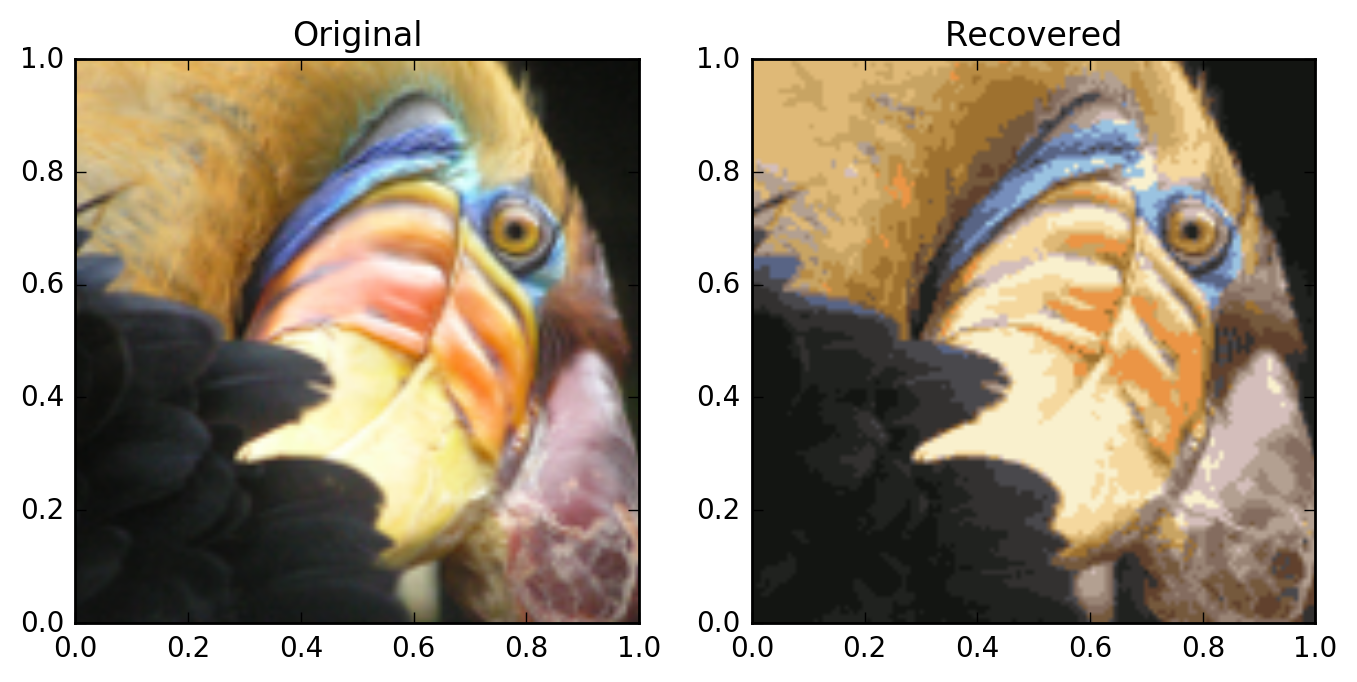

In [16]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.imshow(A, extent=[0, 1, 0, 1])
ax1.set_title('Original')

ax2 = fig.add_subplot(122)
ax2.imshow(X_recovered, extent=[0, 1, 0, 1])
ax2.set_title('Recovered')

# 2 Principal Component Analysis

## 2.1 Example Dataset

In [17]:
a = si.loadmat('ex7_octave/ex7data1.mat')
X = a['X']

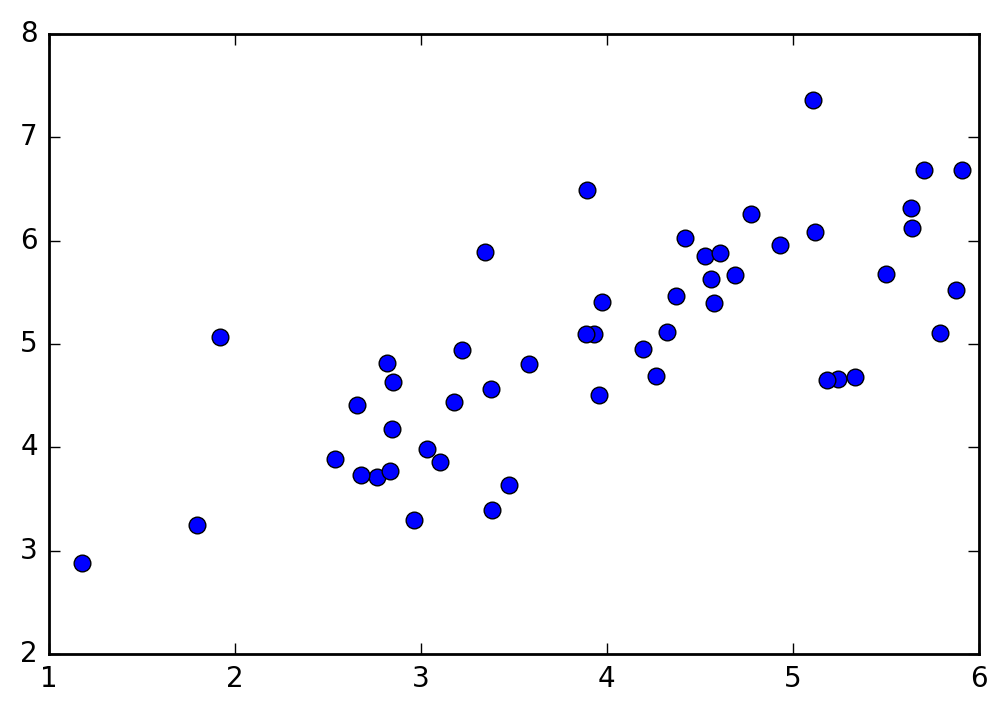

In [18]:
plt.plot(X[:,0], X[:,1], 'bo')

## 2.2 Implementing PCA

In [1]:
def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma  

def pca(X):
    
    m, n = X.shape
    
    # compute covariance matrix
    Sigma = np.dot(X.T, X) / m
    
    # SVD
    u, s, v = np.linalg.svd(Sigma)
    
    return u, s

def drawLine(p1, p2, *args, **kwargs):
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], *args, **kwargs)

In [20]:
# feature normalize
X_norm, mu, sigma = featureNormalize(X)

# perform PCA
U, S = pca(X_norm)

(0.5, 7)

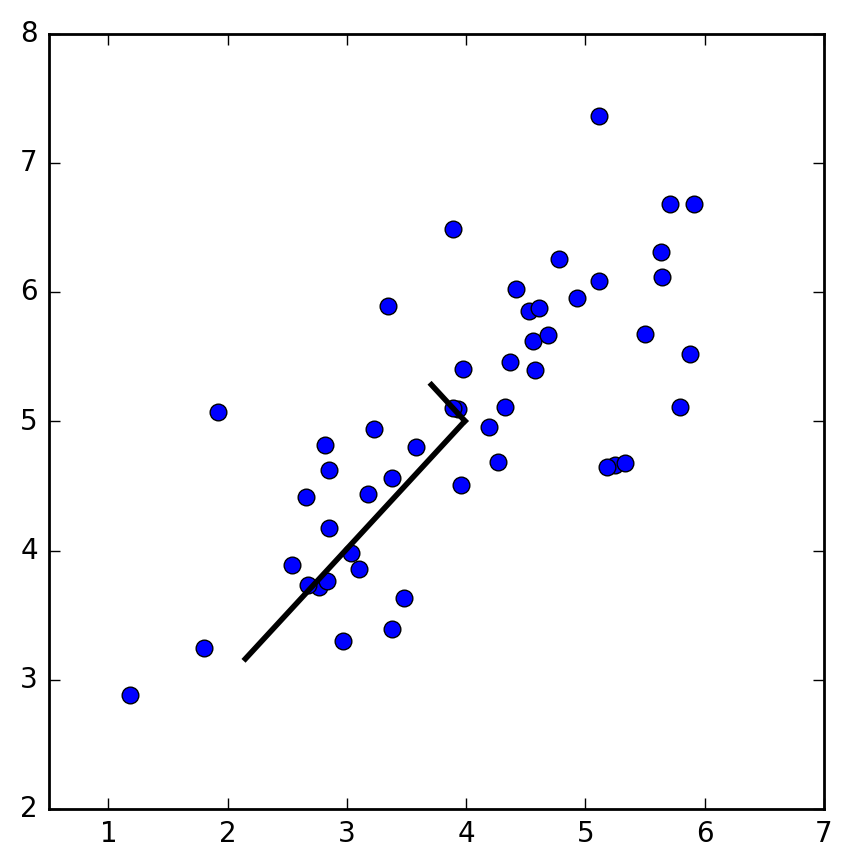

In [21]:
plt.figure(figsize=(5,5))
plt.plot(X[:,0], X[:,1], 'bo')
drawLine(mu, mu+1.5*S[0]*U[:,0], lw=2, color='k')
drawLine(mu, mu+1.5*S[1]*U[:,1], lw=2, color='k')
plt.xlim(0.5, 7)

In [22]:
print U[0,0], U[1,0]

-0.707106781187 -0.707106781187


In [23]:
X.shape

(50, 2)

## 2.3 Dimensionality Reduction with PCA

In [24]:
def projectData(X, U, K):
    
    return np.dot(X, U[:,:K])

def recoverData(Z, U, K):
    
    return np.dot(Z, U[:,:K].T)

### 2.3.1 Projecting the data onto principal components

In [25]:
K = 1
Z = projectData(X_norm, U, 1)
print Z.shape, Z[0]

(50, 1) [ 1.49631261]


### 2.3.2 Reconstructing an approximation of the data

In [26]:
X_rec = recoverData(Z, U, K)
print X_rec[0,0], X_rec[0,1]

-1.05805279222 -1.05805279222


### 2.3.3 Visualizing projections

(-4, 3)

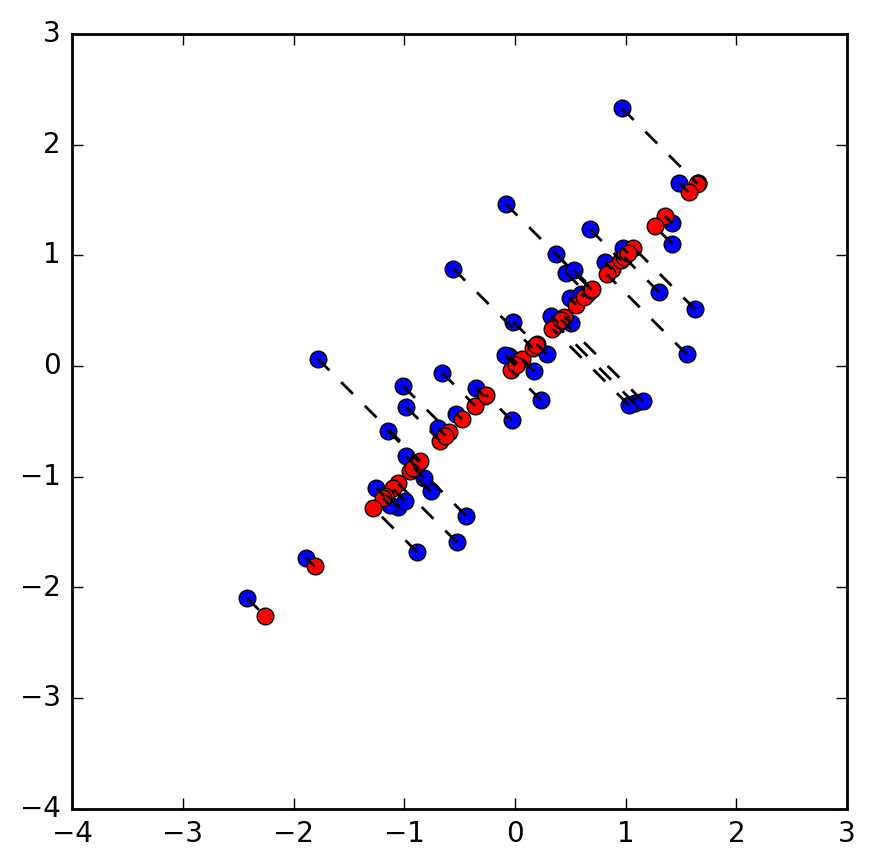

In [27]:
plt.figure(figsize=(5,5))
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.plot(X_rec[:,0], X_rec[:,1], 'ro')
for ii in range(X_norm.shape[0]):
    drawLine(X_norm[ii,:], X_rec[ii,:], '--k')
plt.xlim(-4,3)
plt.ylim(-4,3)

## 2.4 Face Image Dataset

In [28]:
a = si.loadmat('ex7_octave/ex7faces.mat')
X = a['X']

In [29]:
def displayData(X, nrows=10, ncols=10):
    
    # set up array
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols,
                              figsize=(nrows,ncols))
    
    nblock = int(np.sqrt(X.shape[1]))
    
    # loop over randomly drawn numbers
    ct = 0
    for ii in range(nrows):
        for jj in range(ncols):
            #ind = np.random.randint(X.shape[0])
            tmp = X[ct,:].reshape(nblock, nblock, order='F')
            axarr[ii,jj].imshow(tmp, cmap='gray')
            plt.setp(axarr[ii,jj].get_xticklabels(), visible=False)
            plt.setp(axarr[ii,jj].get_yticklabels(), visible=False)
            plt.minorticks_off()
            ct += 1
    
    fig.subplots_adjust(hspace=0, wspace=0)

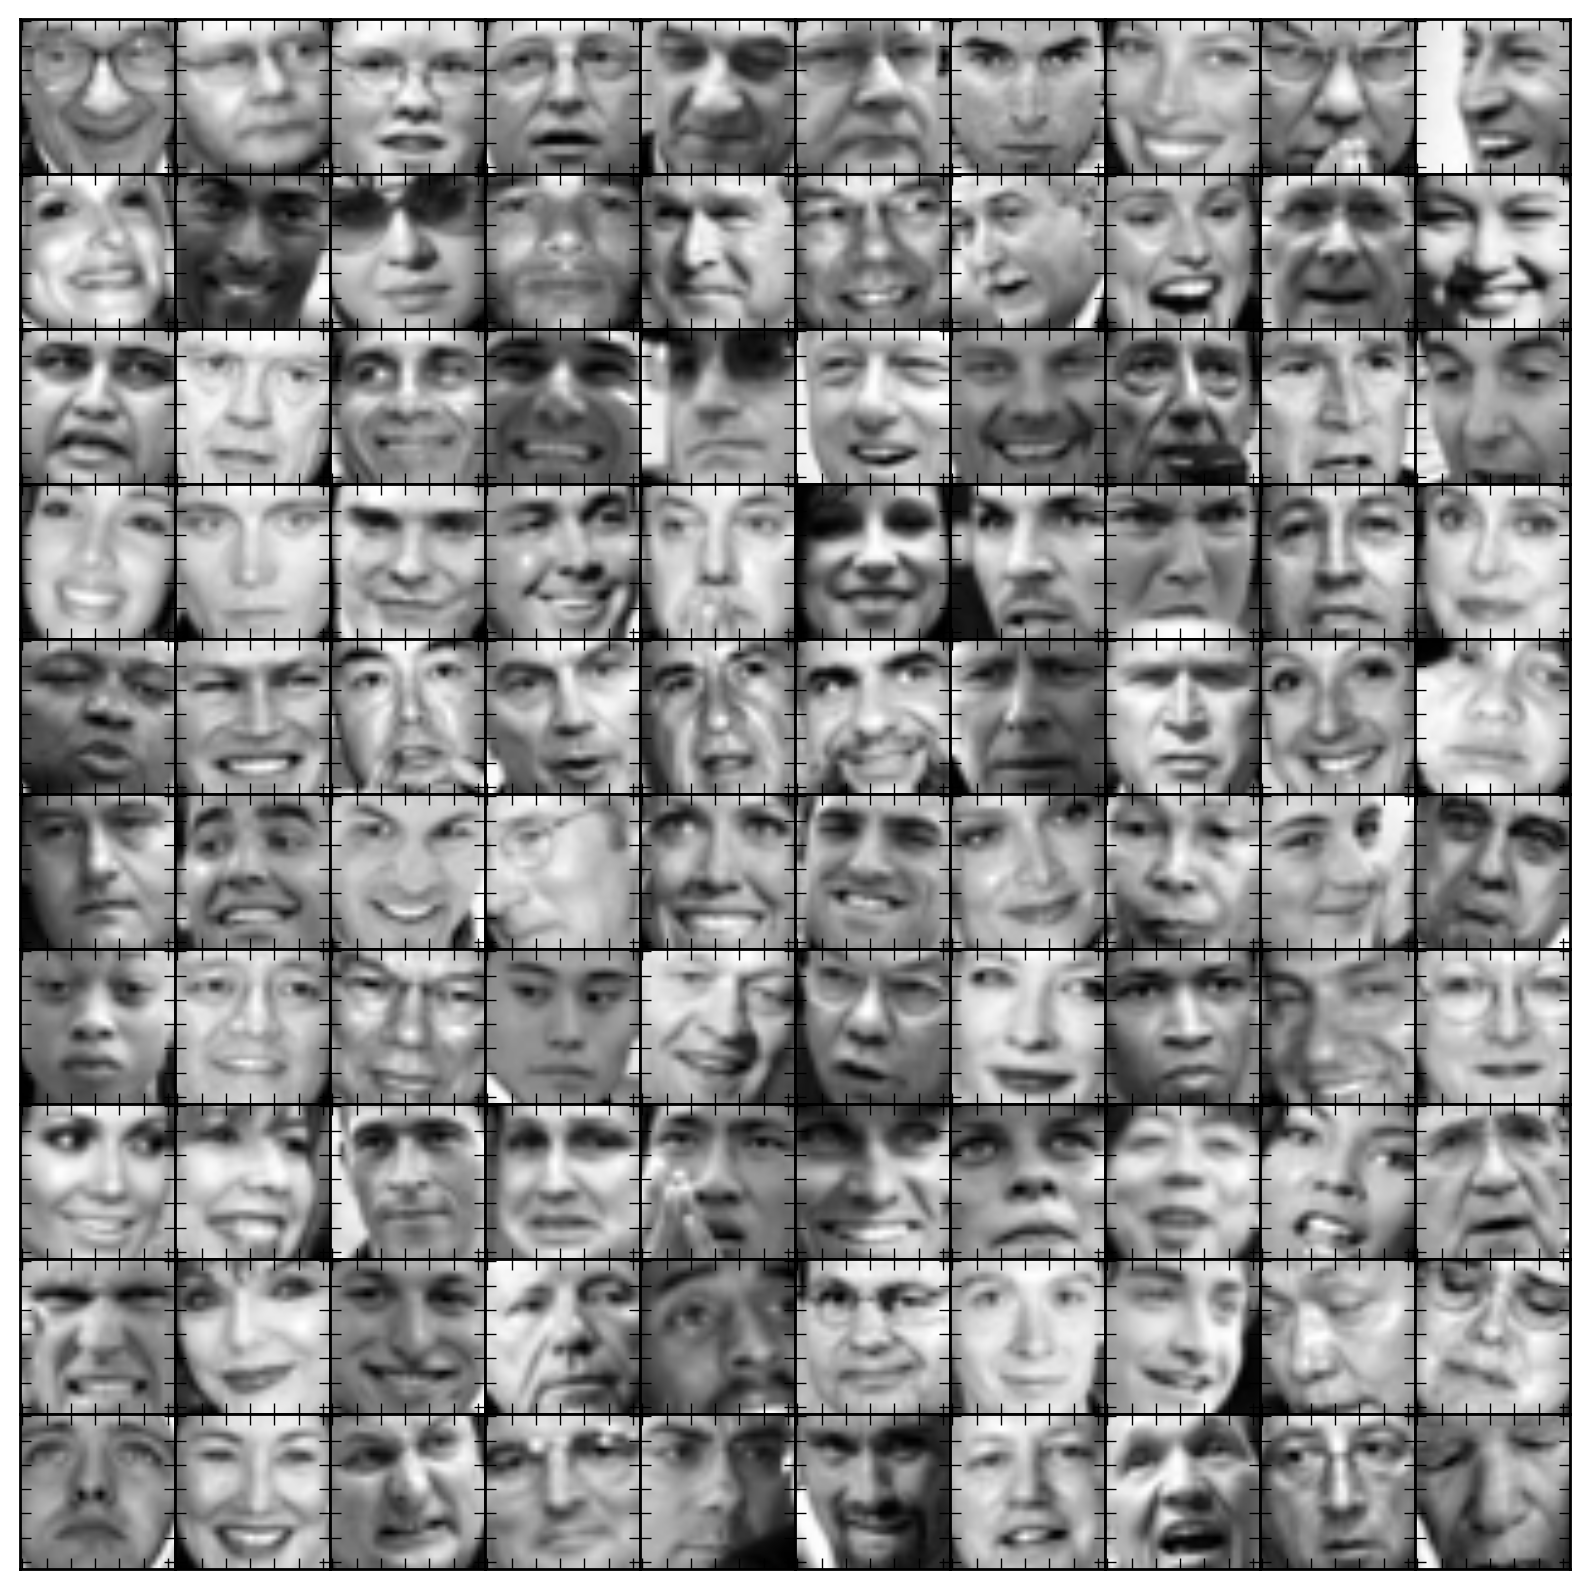

In [30]:
displayData(X)

### 2.4.1 PCA on faces

In [31]:
# feature normalization
X_norm, mu, sigma = featureNormalize(X)

# run PCA
U, S = pca(X_norm)

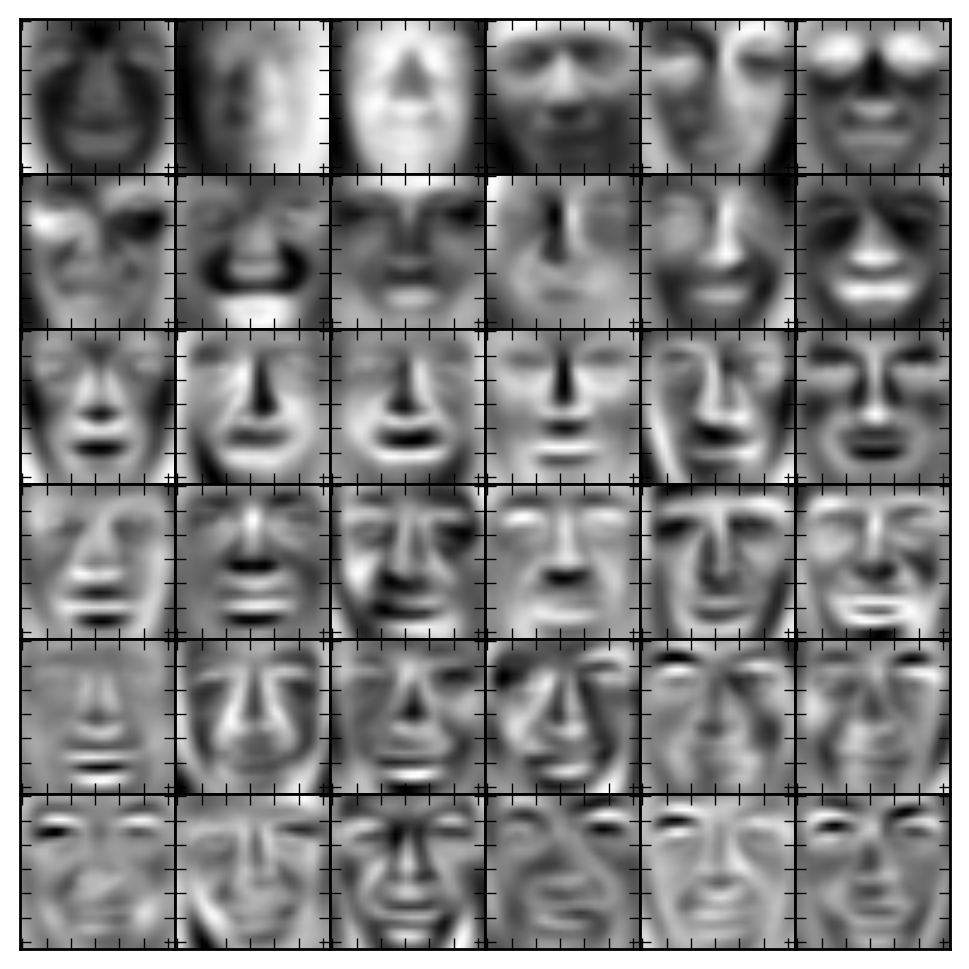

In [32]:
displayData(U.T, nrows=6, ncols=6)

### 2.4.2 Dimensionality reduction

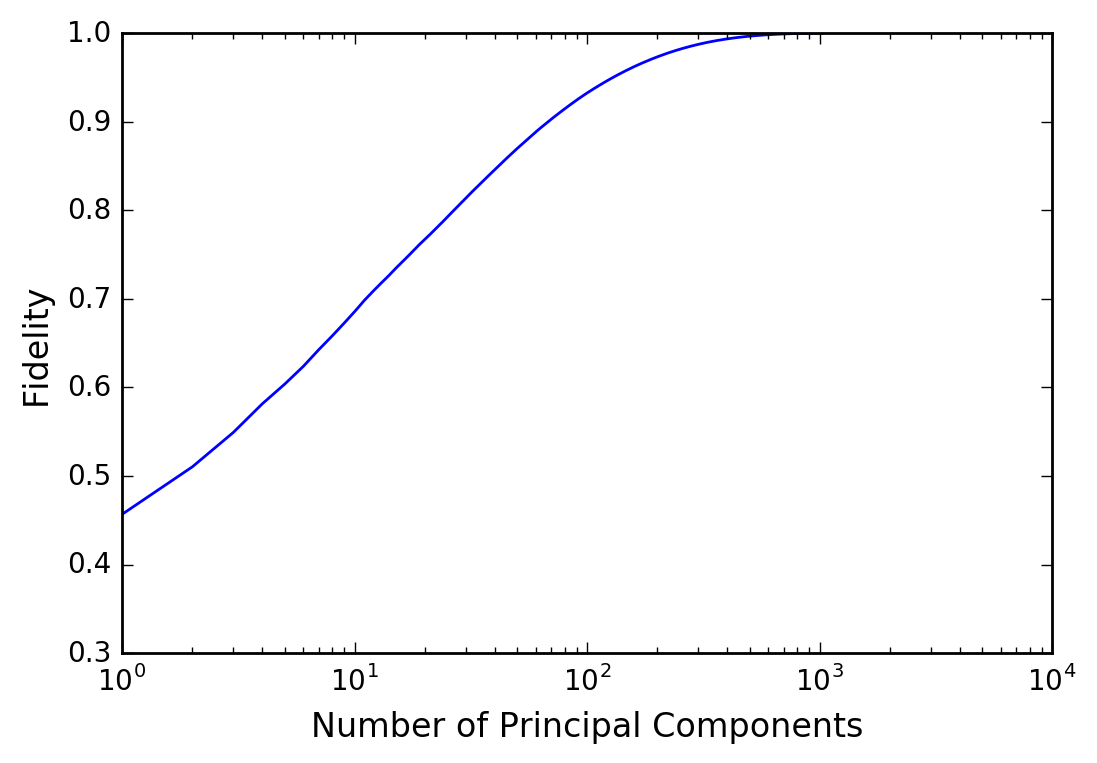

In [39]:
# get cumulative sum of principal components (i.e. fidelity)
plt.semilogx(np.cumsum(S/S.sum()))
plt.ylabel('Fidelity')
plt.xlabel('Number of Principal Components')

In [34]:
# find number of cumulative components such that fidelity is 95%
K = np.flatnonzero(np.cumsum(S/S.sum())>0.95)[0]
Z = projectData(X_norm, U, K)
print Z.shape

(5000, 129)


In [35]:
X_rec = recoverData(Z, U, K)

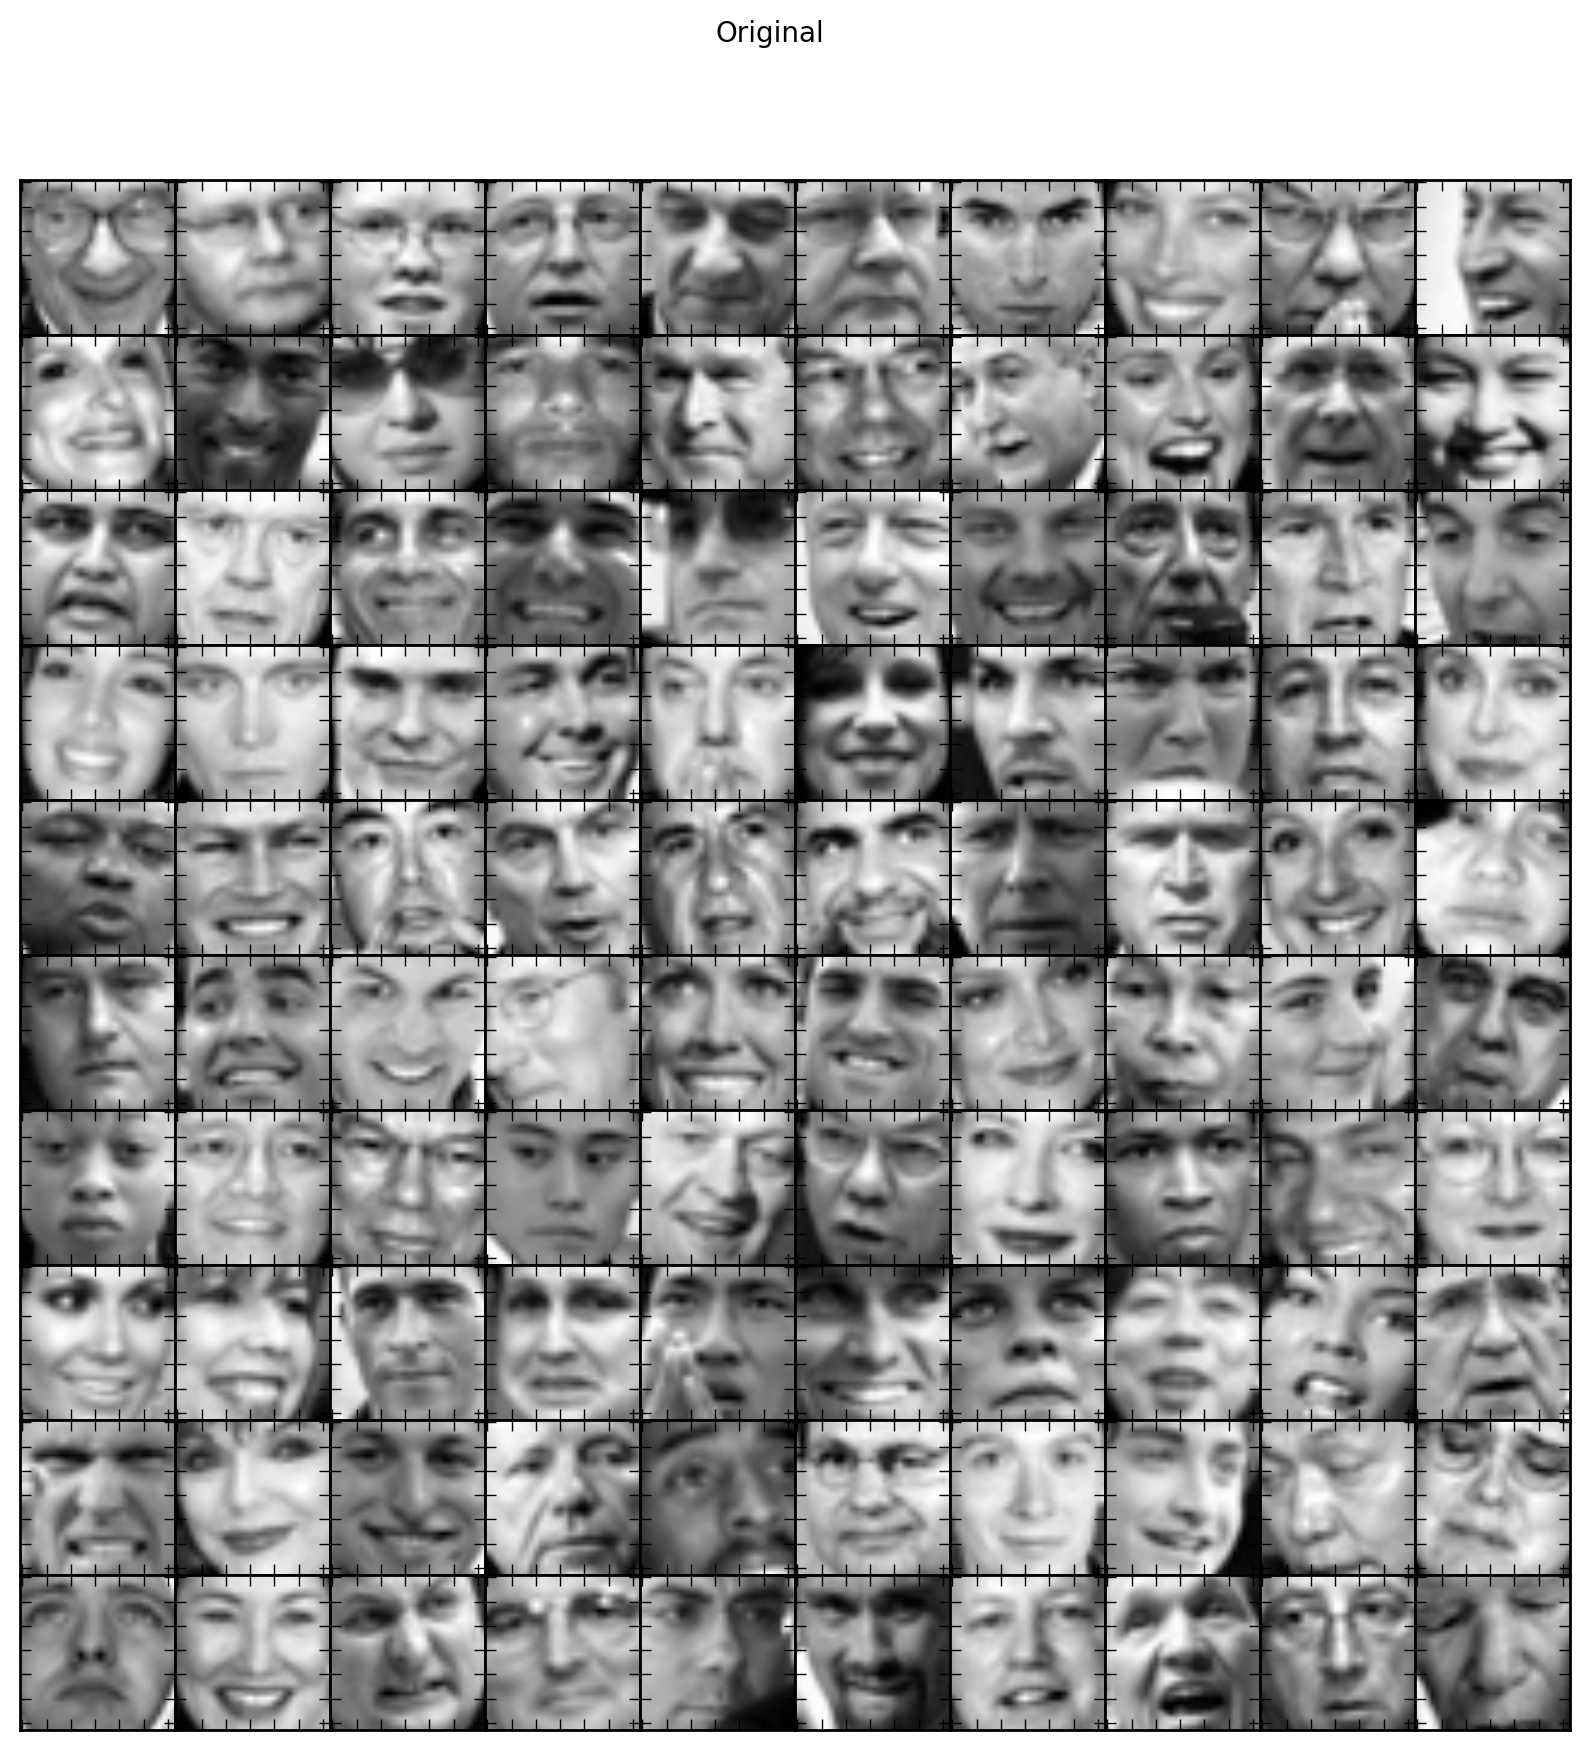

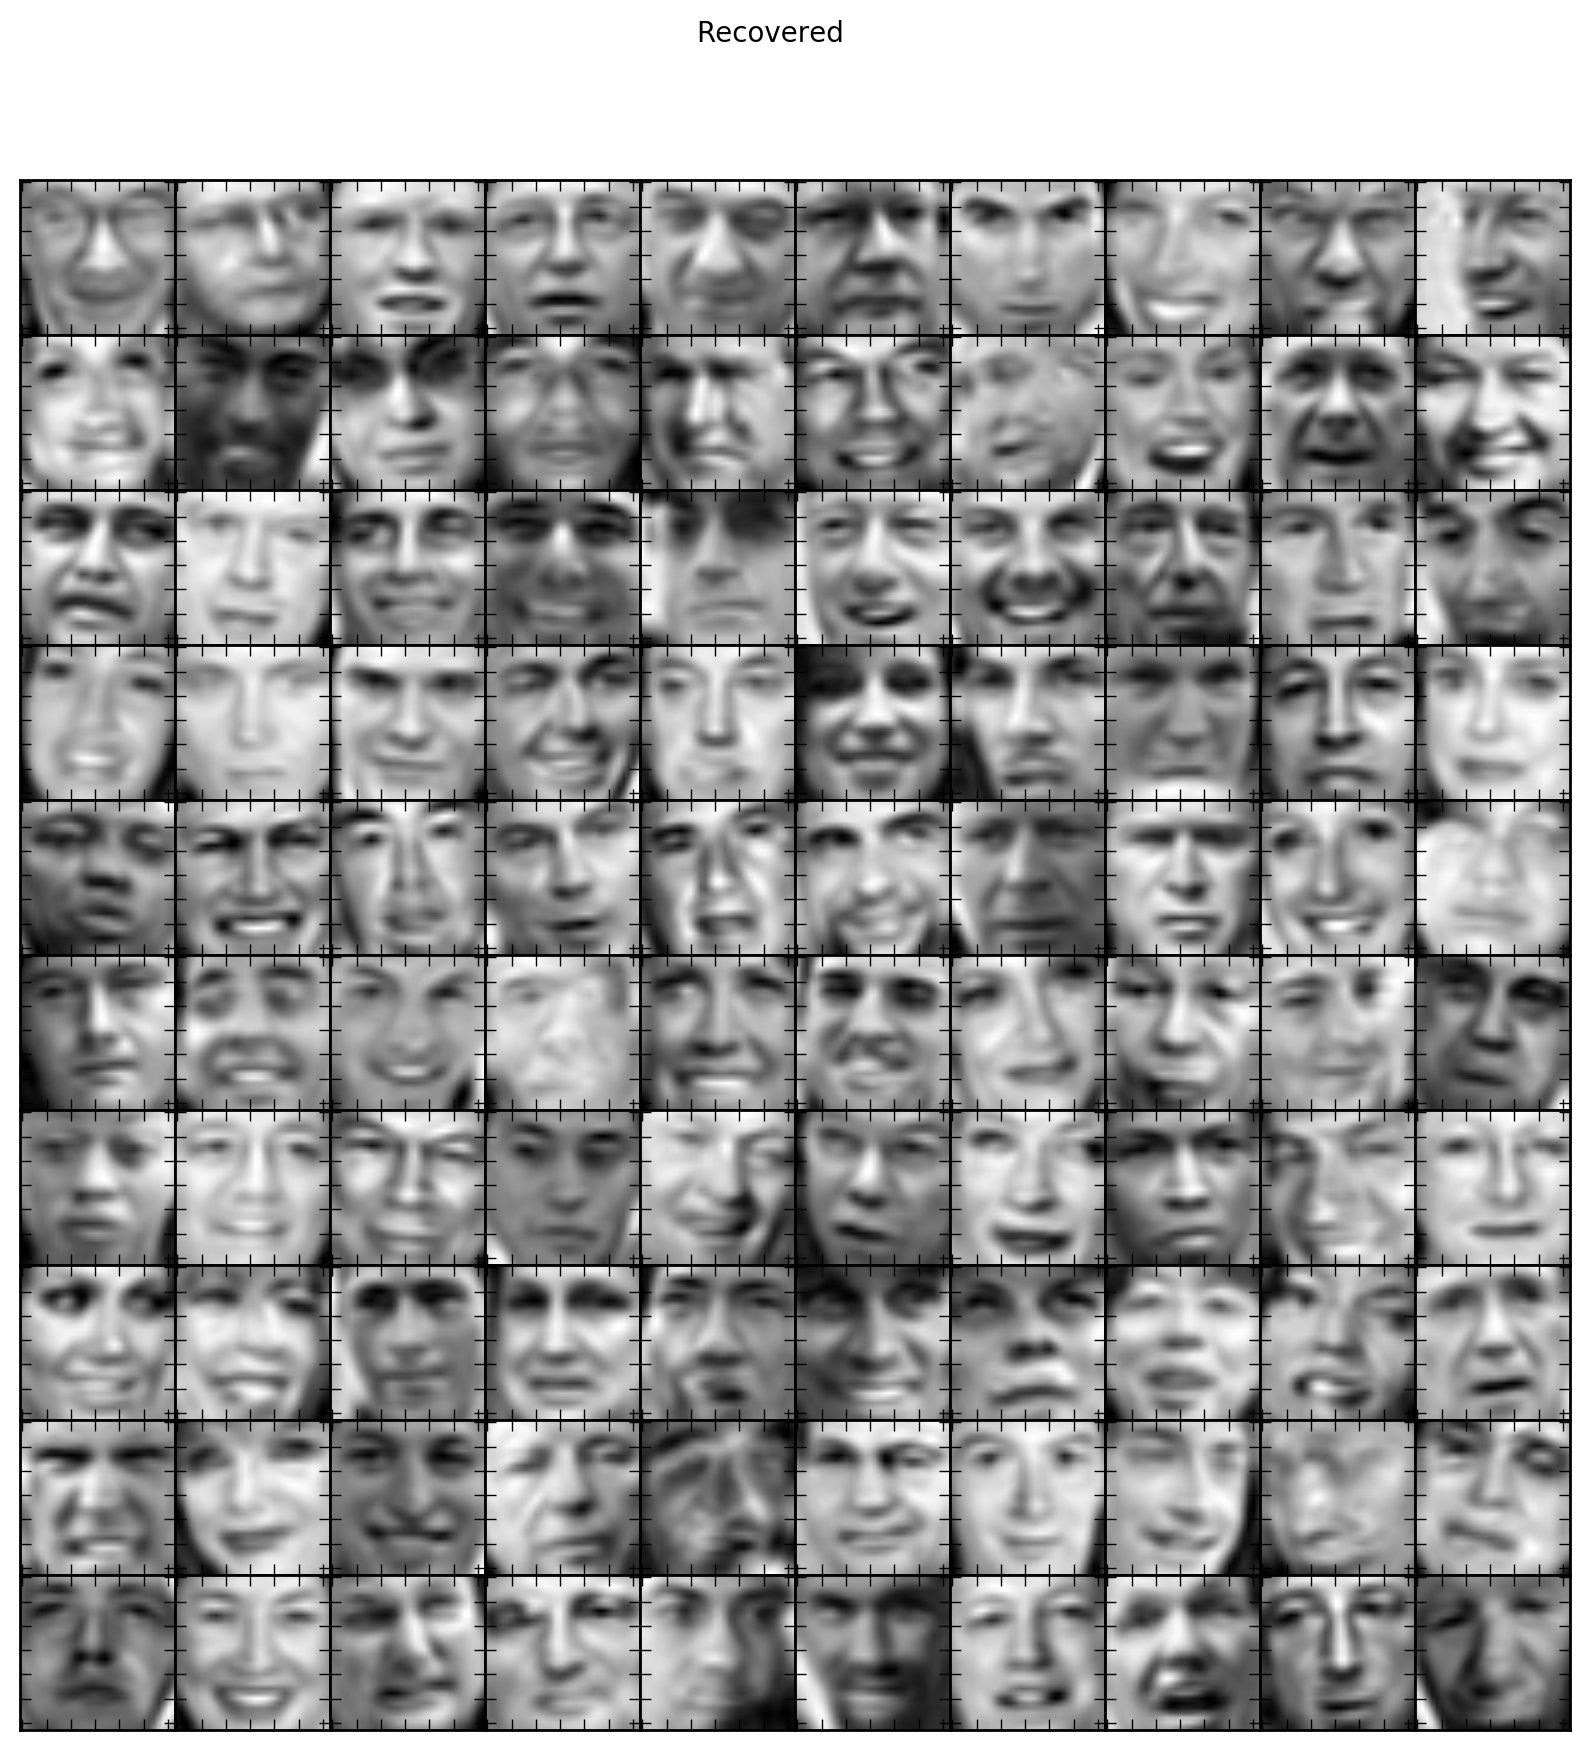

In [36]:
displayData(X_norm*sigma + mu)
plt.suptitle('Original')

displayData(X_rec*sigma + mu)
plt.suptitle('Recovered')